# Voting Systems (part 2)

We are now going to two different, more realistic adversaries. We are gonna do that through $g$ vulnerability.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from func import *
try:
    from qif import *
except: # install qif if not available (for running in colab, etc)
    import IPython; IPython.get_ipython().run_line_magic('pip', 'install qif')
    from qif import *

### Adversary 1

Suppose that an adversary will benefit from guessing correctly how some elector voted, but their benefit does not depend on which elector they choose or who the elector voted for: any victim, and any vote will be a gain for them. We define for that a gain function $g_1$ which allows an adversary to choose from action set $C×E$, where $(c, e)$ is their action of guessing that candidate $c$ was selected by elector $e$.

$g_1$ can be defined as:

$$
g_1((c,e),z) =
\left\{
	\begin{array}{ll}
		1  & \texttt{if } c = z(e) \\
		0 & \texttt{if } c \neq z(e)
	\end{array}
\right.
$$

where $z(e)$ is the candidate voted for by elector $e$ in voting pattern $z$.

If we construct $G_1$ with the possible actions as rows and the possible values of $X$ as columns we get:

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
G_1 & c_1 c_1 c_1 & c_1 c_1 c_2 & c_1 c_2 c_1 & c_1 c_2 c_2 & c_2 c_1 c_1 & c_2 c_1 c_2 & c_2 c_2 c_1 & c_2 c_2 c_2 \\ \hline
(c_1, e_1) & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\ \hline
(c_1, e_2) & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 0 \\ \hline
(c_1, e_3) & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \\ \hline
(c_2, e_1) & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 \\ \hline
(c_2, e_2) & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 \\ \hline
(c_2, e_3) & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\ \hline
\end{array}
$$

In [2]:
num_voters = 3
num_candidates = 2
num_combinations = num_candidates ** num_voters

In [3]:
G1 = get_G1(num_voters, num_candidates)
print(G1)

[[1 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1]]


The posterior vulnerability under $g_1$ gives us the probability that an adversary correctly guesses what a (random) voter voted for. For channel matrix $W$ (as defined in the previous part) this is equal to:

In [4]:
pi = probab.uniform(num_combinations)

In [5]:
W = get_W(num_voters, num_candidates)

In [6]:
print("Prior g vulnerability:", measure.g_vuln.prior(G1, pi))
print("Posterior g vulnerability of W:", measure.g_vuln.posterior(G1, pi, W))
print("Multiplicative g leakage of W:", measure.g_vuln.mult_leakage(G1, pi, W))

Prior g vulnerability: 0.5
Posterior g vulnerability of W: 0.75
Multiplicative g leakage of W: 1.5


If we do the same with channel matrix $C$, we observe the exact same results.

In [7]:
C = get_C(num_voters, num_candidates)

In [8]:
print("Prior g vulnerability:", measure.g_vuln.prior(G1, pi))
print("Posterior g vulnerability of C:", measure.g_vuln.posterior(G1, pi, C))
print("Multiplicative g leakage of C:", measure.g_vuln.mult_leakage(G1, pi, C))

Prior g vulnerability: 0.5
Posterior g vulnerability of C: 0.75
Multiplicative g leakage of C: 1.5


As it turns out there is a theorem adressing the more general case of any number of voters which states that under the uniform prior $\pi$ we have that:

$$
\mathcal{L}^{\times}_{g_1}(\pi, W) = \mathcal{L}^{\times}_{g_1}(\pi, C)
$$

We can verify that results by observing the following plots.

In [9]:
c = 3 # number of candidates
vs = [v for v in range(1, 10)]

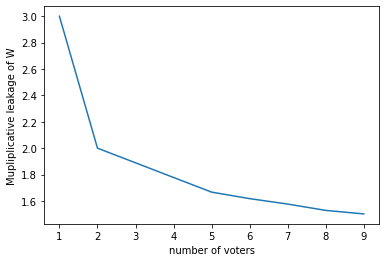

In [10]:
plt.plot(vs, [measure.g_vuln.mult_leakage(get_G1(v, c), probab.uniform(c ** v), get_W(v, c)) for v in vs])
plt.xlabel('number of voters')
plt.ylabel('Mupliplicative leakage of W')
None

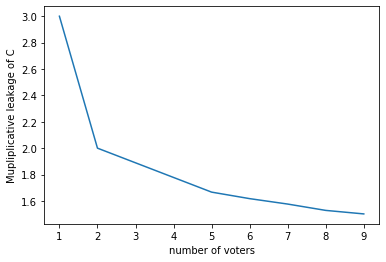

In [11]:
plt.plot(vs, [measure.g_vuln.mult_leakage(get_G1(v, c), probab.uniform(c ** v), get_C(v, c)) for v in vs])
plt.xlabel('number of voters')
plt.ylabel('Mupliplicative leakage of C')
None

Intuitevly this can be understood by the following thought process.

>_For any announcement of tallies for an election whose voting pattern is $z$, it is still the case that most voters in voted for the candidate with the majority, and so the adversary’s optimum guessing strategy is to pick $(maj(z), e)$, which is exactly the same guessing strategy if only the winner is announced. Hence since the optimal guessing strategies are the same for both $W$ and $C$, the leakage with respect to $g_1$ must also be the same._

### Adversary 2

Another adversary might benefit if they can find a voter/candidate pair such that the voter did not vote for that candidate. For this adversary we define $g_0$ as follows:

$$
g_0((c,e),z) =
\left\{
	\begin{array}{ll}
		1  & \texttt{if } c \neq z(e) \\
		0 & \texttt{if } c = z(e)
	\end{array}
\right.
$$

In [12]:
G0 = get_G0(num_voters, num_candidates)
print(G0)

[[0 0 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1]
 [1 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0]]


Notice that $G_0$ is the complement of $G_1$, meaning that it results from switching the $1$s with $0$s and vice versa.

In [13]:
print("Prior g vulnerability:", measure.g_vuln.prior(G0, pi))
print("Posterior g vulnerability of W:", measure.g_vuln.posterior(G0, pi, W))
print("Multiplicative g leakage of W:", measure.g_vuln.mult_leakage(G0, pi, W))

Prior g vulnerability: 0.5
Posterior g vulnerability of W: 0.75
Multiplicative g leakage of W: 1.5


Here it turns out that this type of adversary has more to gain from elections where they announce the votes for each candidate (i.e. channel matrix $C$). Translated into QIF, it basically means that 

$$
\mathcal{L}^{\times}_{g_0}(\pi, W) < \mathcal{L}^{\times}_{g_0}(\pi, C)
$$ 

The following plot vefiries that. Remember that the posterior vulnerability under $g_0$ gives us the probability that an adversary correctly guesses what a (random) voter **did not** vote for. 


In [14]:
c = 3 # number of candidates
vs = [v for v in range(1, 10)]

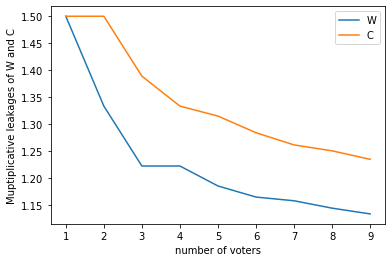

In [16]:
plt.plot(vs, [measure.g_vuln.mult_leakage(get_G0(v, c), probab.uniform(c ** v), get_W(v, c)) for v in vs], label="W")
plt.plot(vs, [measure.g_vuln.mult_leakage(get_G0(v, c), probab.uniform(c ** v), get_C(v, c)) for v in vs], label="C")
plt.xlabel('number of voters')
plt.ylabel('Muptiplicative leakages of W and C')
plt.legend()
None

This result also has a more intuitive explanation.

>_When tallies are released, the adversary can increase their gain by guessing that the candidate who received the least number of votes is most likely not someone the elector selected. That information is not available in $W$._